### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_csv("C:\\Users\punee\cardio_train.csv",sep=';')
print("Rows in the dataset is "+str(df.shape[0]))
print("Columns in the dataset is "+str(df.shape[1]))

Rows in the dataset is 69301
Columns in the dataset is 13


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
# Checking the data type of the dataset
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Converting the age feature in number of days.

In [5]:
def age_year(age):
    new_age = age/365
    return new_age

In [6]:
# Changing the age column of the df into years
df['age'] = df['age'].apply(func = age_year )

In [7]:
# Checking for the missing values in the data
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Dropping the feature 'id' as it is not relevant for the model
df.drop("id",axis=1,inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69297,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69298,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69299,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


### Summary of the data

In [9]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking for the balanced or Imbalanced dataset

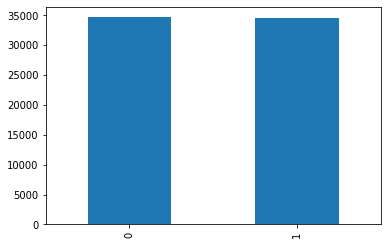

In [10]:
df['cardio'].value_counts().plot(kind='bar')

In [11]:
df[(df['cardio']==1) & (df['gender']==1)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
7,61.772603,1,161,93.0,140,90,2,1,0,0,1,1
9,61.495890,1,158,65.0,140,90,3,1,0,0,1,1
10,45.536986,1,153,57.0,120,80,3,2,0,0,1,1
13,61.912329,1,176,72.0,130,90,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69293,51.484932,1,161,56.0,170,90,1,1,0,0,1,1
69294,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69295,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69297,61.920548,1,158,126.0,140,90,2,2,0,0,1,1


In [12]:
df[(df['cardio']==1) & (df['gender']==2)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
11,56.005479,2,169,82.0,130,90,1,1,0,0,1,1
12,63.473973,2,150,56.0,130,80,2,1,0,0,1,1
20,64.128767,2,170,74.0,140,1000,1,1,0,0,1,1
29,40.128767,2,183,91.0,130,80,2,1,0,0,1,1
32,58.580822,2,170,71.0,130,80,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69271,61.841096,2,173,103.0,140,80,3,1,1,1,0,1
69276,58.257534,2,182,100.0,120,80,1,1,0,0,1,1
69282,47.945205,2,182,110.0,130,90,2,2,0,0,1,1
69285,49.112329,2,168,80.0,120,80,1,1,0,0,1,1


### Males(Gender==1) tends to have more cardiovascular disease than women.

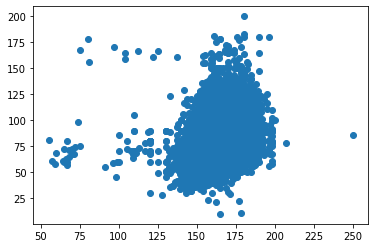

In [13]:
plt.scatter(df['height'],df['weight'])
plt.show()

In [14]:
# There is no corelation between height and weight but some extreme values are present in the data.

In [15]:
### Checking for the correlation between the variables
df.corr().abs()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,0.023150,0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,0.047680,0.029435,0.009926,0.238095
gender,0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,0.036335,0.021154,0.337608,0.171015,0.006241,0.008592
height,0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,0.050632,0.018929,0.187899,0.094164,0.005974,0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,0.016514,0.182094
ap_hi,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,0.000933,0.001385,0.000032,0.054211
ap_lo,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.154343,0.036335,0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,0.021154,0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,0.004608,0.011442,0.007301,0.089062
smoke,0.047680,0.337608,0.187899,0.068304,0.000933,0.004948,0.010237,0.004608,1.000000,0.339709,0.025794,0.015225
alco,0.029435,0.171015,0.094164,0.067259,0.001385,0.010764,0.036015,0.011442,0.339709,1.000000,0.025745,0.007217


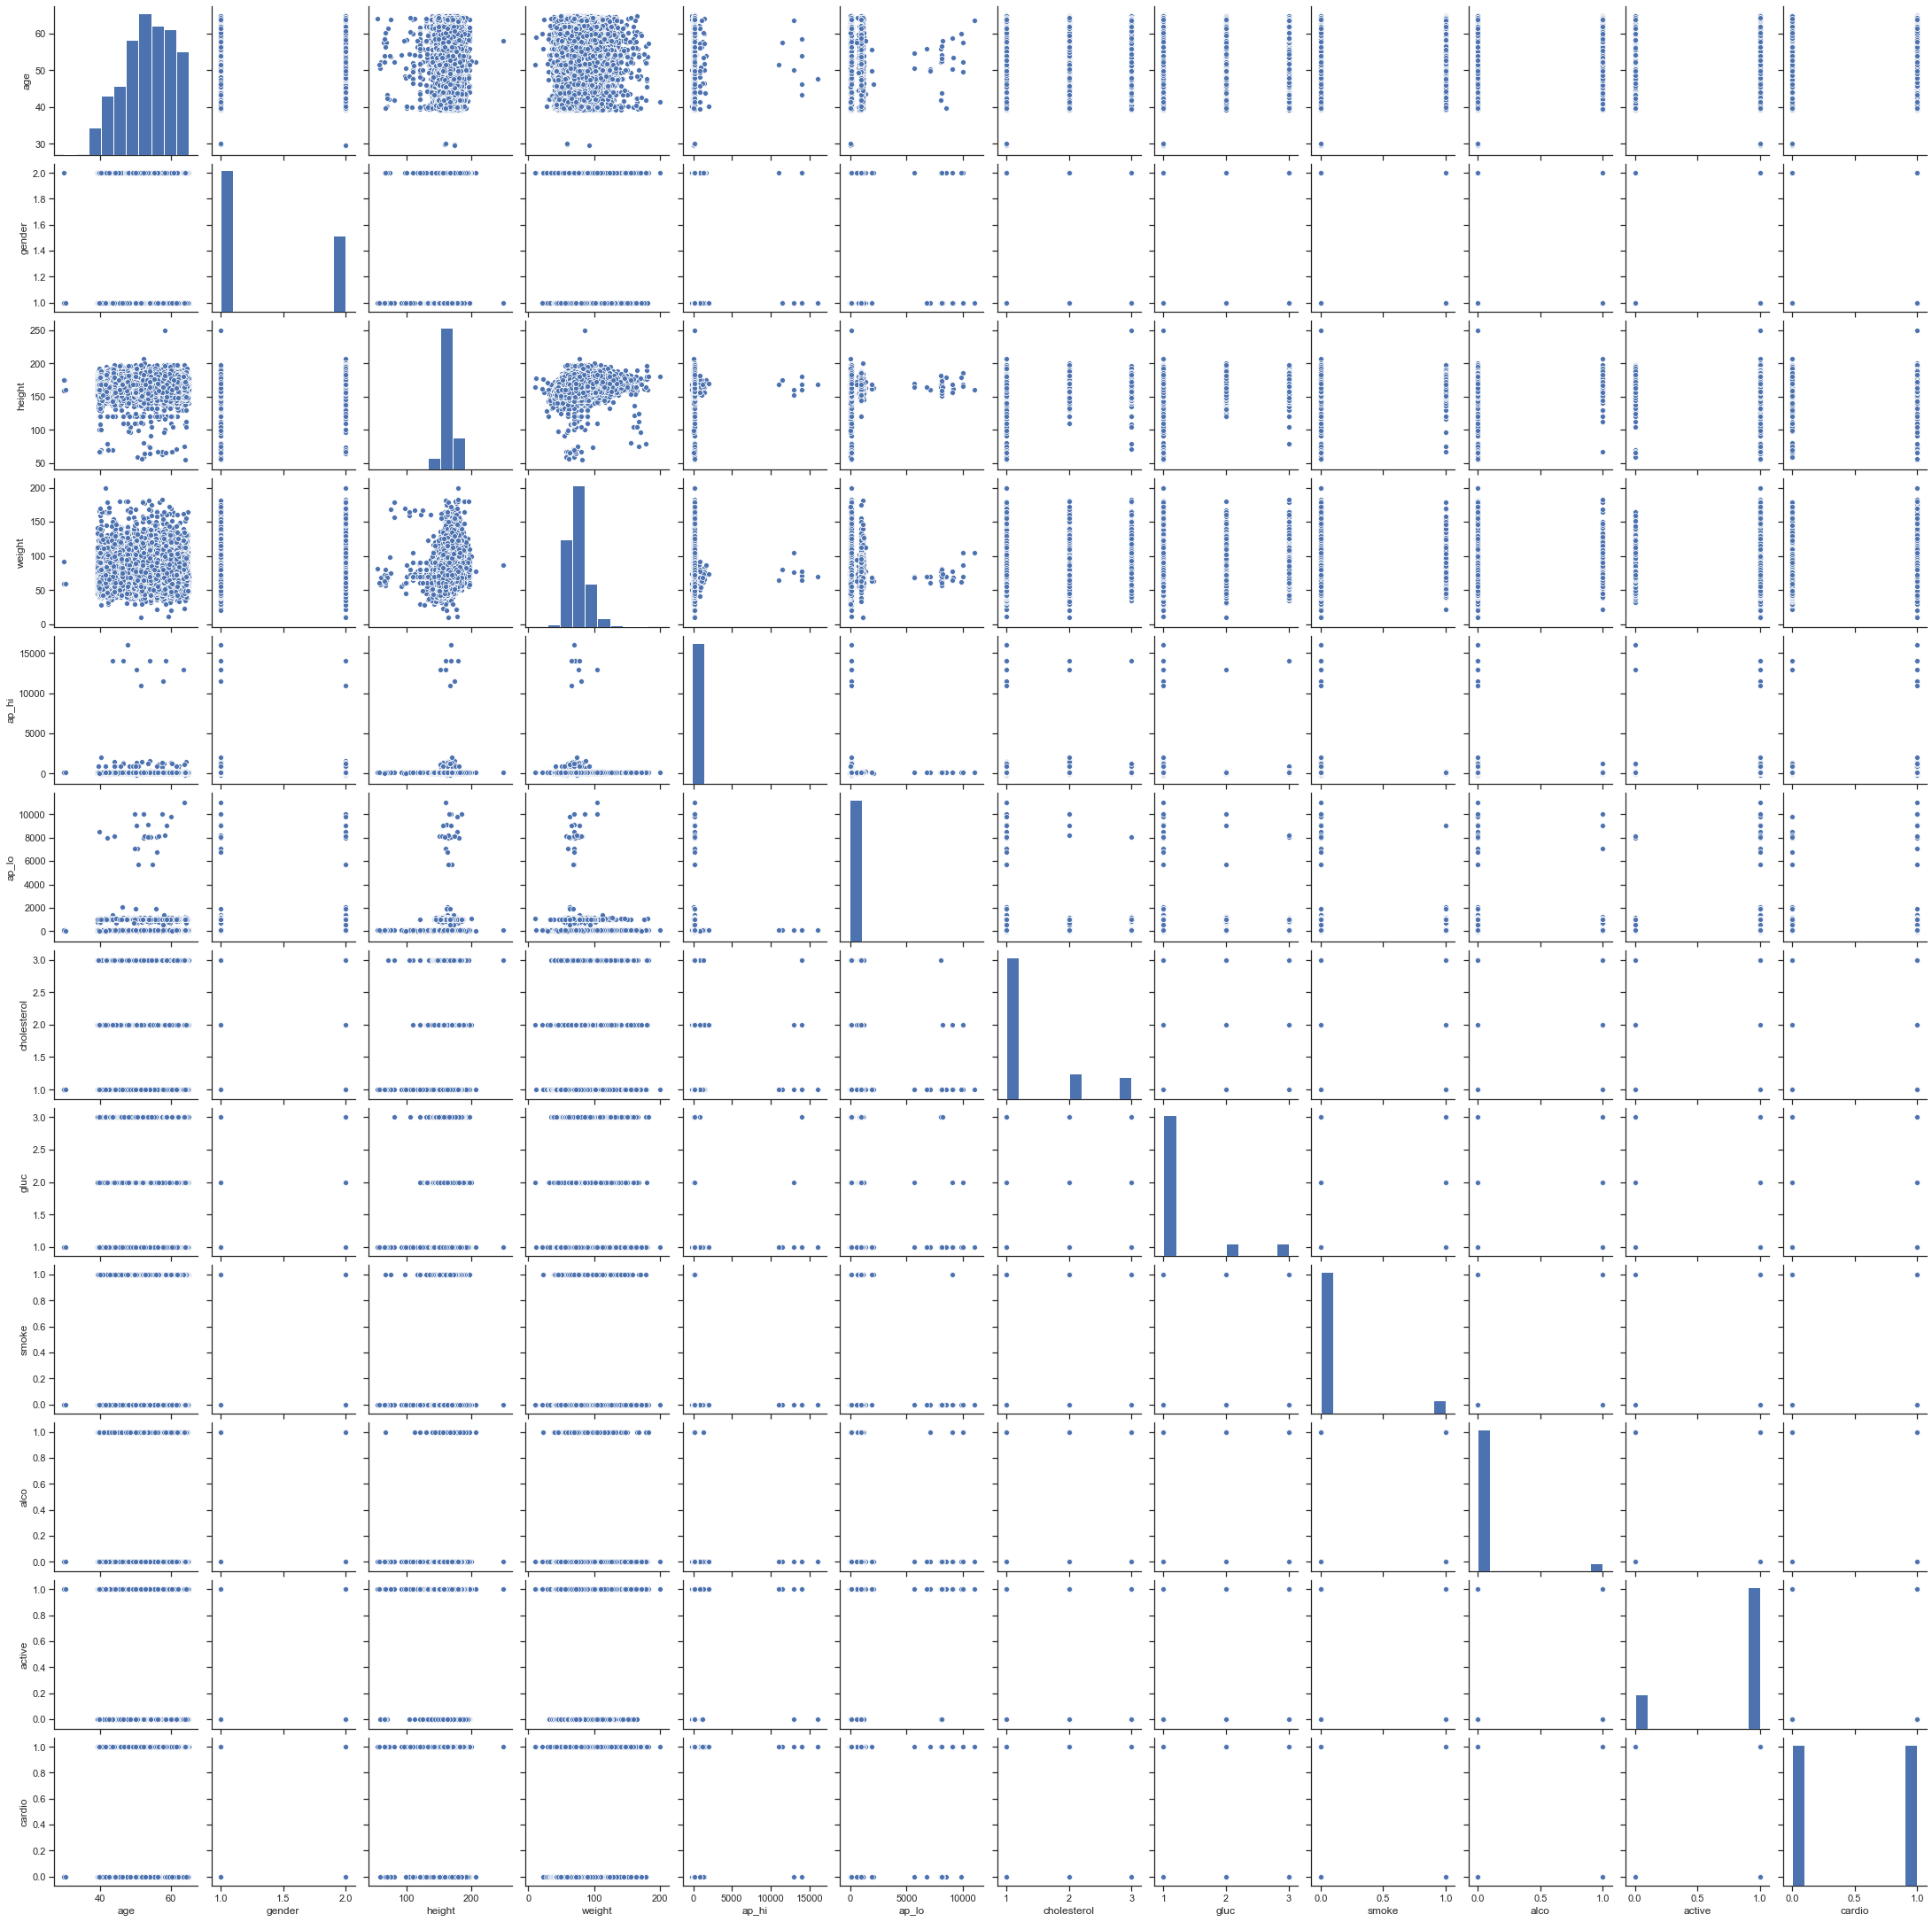

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

(<matplotlib.axes._subplots.AxesSubplot at 0x182d21fc288>,)

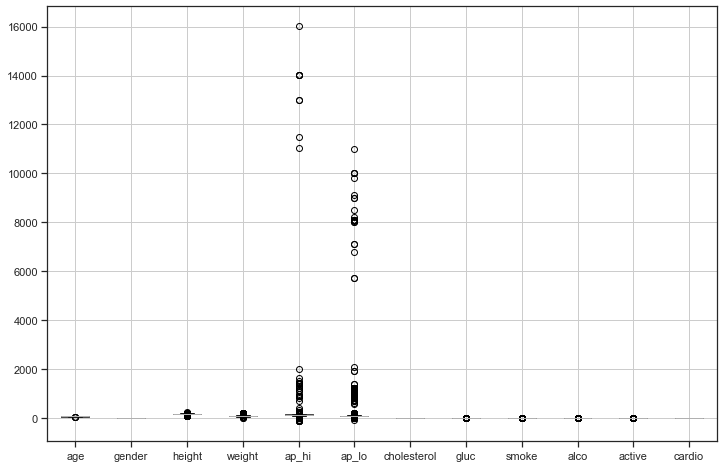

In [17]:
# Boxplot of the Data
plt.figure(figsize=(12,8))
df.boxplot(),

### Feature ap_hi and ap_lo contains alot of outliers.

In [18]:
### Removing the outliers using the quantile function.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            10.032877
gender          1.000000
height         11.000000
weight         17.000000
ap_hi          20.000000
ap_lo          10.000000
cholesterol     1.000000
gluc            0.000000
smoke           0.000000
alco            0.000000
active          0.000000
cardio          1.000000
dtype: float64


In [19]:
df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_final.shape

(37666, 12)

In [20]:
df_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0
5,57.926027,1,164,61.0,100,70,1,1,0,0,1,0
6,49.547945,1,162,72.0,100,70,1,1,0,0,1,0


In [21]:
### Seperating the Independent and dependent features from the data
X = df.drop('cardio',axis=1)
y = df['cardio']

In [22]:
### Splitting the data ### 
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
### Standardscaler for the standardization of the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [24]:
lg = LogisticRegression(penalty='l1',C=10,solver='saga')
lg.fit(X_train,y_train)
pred = lg.predict(X_test)
score = accuracy_score(pred , y_test)
mat = classification_report(y_test , pred)
print("Accuracy Score of the mode is {}".format(score))
print(mat)

Accuracy Score of the mode is 0.716149140020778
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      8654
           1       0.73      0.68      0.70      8672

    accuracy                           0.72     17326
   macro avg       0.72      0.72      0.72     17326
weighted avg       0.72      0.72      0.72     17326



In [25]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score = accuracy_score(y_pred , y_test)
mat = classification_report(y_test , y_pred)
print("Accuracy Score of the mode is {}".format(score))
print(mat)

Accuracy Score of the mode is 0.7256146831351725
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      8654
           1       0.74      0.69      0.72      8672

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.73     17326
weighted avg       0.73      0.73      0.73     17326



In [26]:
### Applying Knn###
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred , y_test)
mat = classification_report(y_test , y_pred)
print("Accuracy Score of the mode is {}".format(score))
print(mat)

Accuracy Score of the mode is 0.6627034514602331
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      8654
           1       0.67      0.65      0.66      8672

    accuracy                           0.66     17326
   macro avg       0.66      0.66      0.66     17326
weighted avg       0.66      0.66      0.66     17326



In [27]:
### Applying the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_pred , y_test)
mat = classification_report(y_test , y_pred)
print("Accuracy Score of the mode is {}".format(score))
print(mat)

Accuracy Score of the mode is 0.7305206048712917
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8654
           1       0.76      0.67      0.71      8672

    accuracy                           0.73     17326
   macro avg       0.73      0.73      0.73     17326
weighted avg       0.73      0.73      0.73     17326



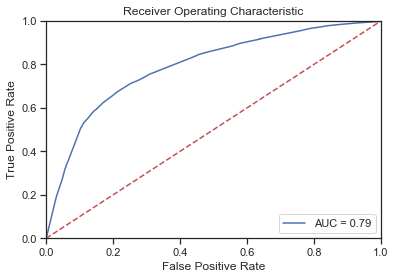

In [28]:
# Plotting the ROC-AUC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# Plotting the curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#### From the accuracy of the models , Decision tree is predicting the best.####